 _____      _ _    ____                     _      _    ___              _ 
| ____|_ __(_) | _| __ ) _ __ ___ _ __   __| | ___| |  / / |   _   _  __| |
|  _| | '__| | |/ /  _ \| '__/ _ \ '_ \ / _` |/ _ \ | / /| |  | | | |/ _` |
| |___| |  | |   <| |_) | | |  __/ | | | (_| |  __/ |/ / | |__| |_| | (_| |
|_____|_|  |_|_|\_\____/|_|  \___|_| |_|\__,_|\___|_/_/  |_____\__,_|\__,_|
                                                                           
                 ____                 
 _   _ _ __ ___ |  _ \  __ _ _ __ ___ 
| | | | '_ ` _ \| | | |/ _` | '__/ _ \
| |_| | | | | | | |_| | (_| | | |  __/
 \__,_|_| |_| |_|____/ \__,_|_|  \___|
                                      

updating ErikBrendel/LudumDare...
Repo is up to date!
Analyzing 44 of 44 files
Skipped 0 test roots: []
Found 565 classes, methods and fields!
Nodes in project structure: 565
Using precalculated evolutionary values
Total node count: 368
Methods: 192
constructors: 22
fields: 103
classes: 9
interfaces: 0
enums

Analyzing edges:   0%|          | 0/8174 [00:00<?, ?it/s]

Results:

Pattern 0 ([1, 0, 'Strong evolutionary coupling across a big distance']):
  Amount of disagreements: 16348 which is 96.73% of all edges


/mnt/brick/github/tools/pypy3.7-v7.3.3-linux64/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)
/mnt/brick/github/tools/pypy3.7-v7.3.3-linux64/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


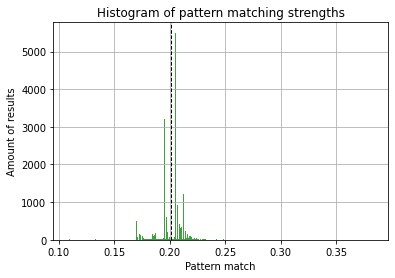

  Strong nontrivial disagreements: 16348
   particles/AsteroidParts.java/AsteroidParts/render <> logic/Layer.java/Layer/update  -  0.38309271605246287
   logic/Physics.java/Physics/showAsteroidParticles <> logic/Player.java/Player/gameLost/run  -  0.37166718642348007
   logic/Physics.java/Physics/showAsteroidParticles <> logic/Player.java/Player/gameLost  -  0.3578422955724109
   util/web/Highscores.java/Highscores/getMac <> main/Main.java/Main/update  -  0.3439241914115855
   util/web/Highscores.java/Highscores/getMac <> logic/GameOverScreen.java/GameOverScreen/draw  -  0.3439241914115855
   util/gfx/GfxLoader.java/GfxLoader/intersect <> logic/Physics.java/Physics/doPhysics  -  0.31482373372113015
   util/gfx/GfxLoader.java/GfxLoader/intersect <> logic/Physics.java/Physics/repel  -  0.31482373372113015
   util/web/Highscores.java/Highscores/upload <> logic/GameOverScreen.java/GameOverScreen/draw  -  0.3125445227740787
   util/gfx/GfxLoader.java/GfxLoader/loadImage <> util/sounds/Sound

interactive(children=(FloatLogSlider(value=0.5, description='evolutionary', layout=Layout(width='500px'), max=…


Program is over!


In [27]:
import logging
import pdb
logging.basicConfig(level=logging.INFO)
%matplotlib inline
%run LocalRepo.ipynb
%run repos.ipynb
%run parsing.ipynb
%run metrics.ipynb
%run analysis.ipynb
import pyfiglet
import numpy as np
# np.seterr(all='raise')
import os


repos = [
    "eclipse/eclipse.jdt.core",  # from duerschmidt
    "ErikBrendel/LudumDare", # 8 minutes BTM
    "neuland/jade4j",
    "jfree/jfreechart",
    "brettwooldridge/HikariCP",  # 1.2h BTM
    "adamfisk/LittleProxy",  # 1.5h BTM
    "dynjs/dynjs",  # 2.5h BTM
    # "SonarSource/sonarqube",  # quite big / prob. several hours BTM
    "square/okhttp",
    "jenkinsci/jenkins",
    "eclipse/che",
    "elastic/elasticsearch",
    "apache/camel"
    "jOOQ/jOOQ"
]
repos = ["ErikBrendel/LudumDare"]



views = [] # ["structural", "evolutionary", "linguistic"]
for repo in repos:
    r = LocalRepo(repo)
    print(pyfiglet.figlet_format(r.name))
    r.update()
    
    # pdb.set_trace()
    print("Nodes in project structure:", r.get_tree().node_count())
    
    for view in views:
        # MetricManager.clear(r, view)

        coupling_graph = MetricManager.get(r, view)
        coupling_graph.plaintext_save(repo)
        # coupling_graph.html_save(repo)
        

        print("\nResults from the " + view + " view:\n")

        coupling_graph.print_statistics()
        coupling_graph.print_most_linked_nodes()
        coupling_graph.show_weight_histogram()
        # coupling_graph.visualize(use_spring=False, with_labels=False)
        print("\n")
    
    # amalysis
    repo_tree = r.get_tree()
    def node_filter(node_path):
        tree_node = repo_tree.find_node(node_path)
        return tree_node.get_type() == "method" and tree_node.get_line_span() >= 4
    def node_pair_filter(node_a_path, node_b_path):
        return path_module_distance(node_a_path, node_b_path) > 2
        
    #analyze_disagreements(r, ["structural", "evolutionary", "linguistic"], [
    #    [0, 1, None, "unrelated functionality that gets adjusted together"],
    #    [0, 0, 1, "duplicated concepts, developed separately"],
    #    [None, 0, 1, "duplicated concepts, adjusted separately"],
    #    [1, None, 0, "weakly modularized code"]
    #])
    
    #analyze_disagreements(r, ["structural", "evolutionary", "module_distance"], [
    #    [0, 1, None, "unrelated functionality that gets adjusted together"],
    #    [1, None, 0, "Strong structural coupling across a big distance"],
    #    [None, 1, 0, "Strong evolutionary coupling across a big distance"],
    #])
    
    analyze_disagreements(r, ["evolutionary", "module_distance"], [
        [1, 0, "Strong evolutionary coupling across a big distance"],
    ], node_filter, node_pair_filter)
    
print("\nProgram is over!")